In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_train = pd.read_csv('/content/sample_data/train.csv')
# df_train = pd.read_csv('train.csv') # code file and dataset at the same location

In [14]:
df_train.shape

(42000, 785)

In [15]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train = df_train['label']
X_train = df_train.drop('label', axis=1)

In [18]:
X_train.shape

(42000, 784)

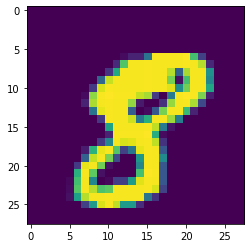

In [83]:
plt.imshow(X_train.iloc[10].values.reshape(28,28))

In [84]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# Data Preparation

In [85]:
X_train_scaled = X_train/255

In [86]:
from tensorflow.keras.utils import to_categorical

In [87]:
y_train_cat = to_categorical(y_train, num_classes=10)

In [88]:
y_train_cat.shape

(42000, 10)

# Model Building

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [90]:
model = Sequential() # Empty model
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
hist = model.fit(X_train_scaled,y_train_cat, epochs=30, batch_size=64)

Epoch 1/30
657/657 [==============================] - 3s 3ms/step - loss: 0.3896 - accuracy: 0.8870
Epoch 2/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1797 - accuracy: 0.9454
Epoch 3/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1360 - accuracy: 0.9591
Epoch 4/30
657/657 [==============================] - 2s 3ms/step - loss: 0.1094 - accuracy: 0.9676
Epoch 5/30
657/657 [==============================] - 2s 3ms/step - loss: 0.0920 - accuracy: 0.9722
Epoch 6/30
657/657 [==============================] - 2s 3ms/step - loss: 0.0789 - accuracy: 0.9752
Epoch 7/30
657/657 [==============================] - 2s 3ms/step - loss: 0.0694 - accuracy: 0.9792
Epoch 8/30
657/657 [==============================] - 2s 3ms/step - loss: 0.0609 - accuracy: 0.9822
Epoch 9/30
657/657 [==============================] - 2s 3ms/step - loss: 0.0541 - accuracy: 0.9830
Epoch 10/30
657/657 [==============================] - 2s 3ms/step - loss: 0.0485 - accuracy: 0.9853

In [92]:
model.save('my_digit_rec_model.h5')

In [93]:
from tensorflow.keras.models import load_model

In [94]:
mymodel = load_model('my_digit_rec_model.h5')

In [67]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import cv2

In [97]:
img = cv2.imread('/content/sample_data/eight.png',0) #gray

In [98]:
type(img)

numpy.ndarray

In [99]:
img.shape

(248, 251)

In [100]:
img = cv2.resize(img,(28,28))
img.shape

(28, 28)

In [101]:
import matplotlib.pyplot as plt

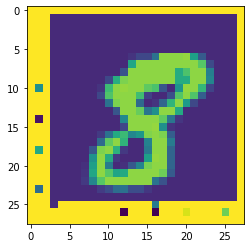

In [102]:
plt.imshow(img)

In [103]:
img = img/255

In [104]:
img = img.reshape(1,784)
img.shape

(1, 784)

In [105]:
mymodel.predict_on_batch(img).argmax()

7

In [108]:
def get_predictions(path):
    img = cv2.imread(path,0) #gray
    img = cv2.resize(img,(28,28))
    img = img/255
    img = img.reshape(1,784)
    return mymodel.predict_on_batch(img).argmax()

In [109]:
get_predictions('/content/sample_data/eight.png')

7